# QCTO - Workplace Module

### Project Title: Regional and Packaging Trends in Avocado Prices: 2015-2023
#### Done By: Tshepiso Mudau
#### Github Repo: https://github.com/tshepisoMudau/Regional-and-Packaging-Trends-in-Avocado-Prices-2015-2023

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

### Introduction

The goal of this project is to analyze historical data from the Hass Avocado Board to understand how regional differences and packaging types (bulk vs. bagged) have influenced avocado prices and sales trends between 2015 and 2023. By examining these factors, we aim to uncover seasonal and regional patterns, consumer preferences, and price dynamics, ultimately developing a predictive model to forecast future avocado prices. This analysis will provide valuable insights into market trends that can assist retailers, farmers, and industry stakeholders in making informed decisions.

### Problem Statement and Objectives

Avocado consumption has surged in recent years, and understanding the factors influencing its pricing and sales trends is crucial for businesses across the supply chain. The dataset includes key variables such as avocado type (bulk vs. bagged), region, and price over time, allowing us to address the following questions:

- Regional Price Variability: How do avocado prices fluctuate across different U.S. regions? Are there specific regions where prices are consistently higher or lower?
- Packaging Preferences: Do consumers prefer bulk or bagged avocados, and how does this preference impact prices and sales?
- Seasonal Effects: What role does seasonality play in avocado pricing and sales volumes? Are there noticeable peaks or dips during certain times of the year?
- Price Forecasting: Can we build a predictive model to estimate future avocado prices based on historical data, regional differences, and packaging type?

##### This project leverages historical data analysis and predictive modeling to provide actionable insights, helping stakeholders anticipate market shifts and optimize their business strategies.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>


---

In [1]:
# Data manipulation
import pandas as pd
import numpy as np


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date and time handling
import datetime as dt

# Machine learning and statistical modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

# Utility for saving/loading models
import joblib


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

### Purpose:

The data used for this analysis was sourced from the **Hass Avocado Board**, a dataset publicly available on **Kaggle**. It contains historical information on avocado prices and sales volume across various regions in the United States from 2015 to 2023. The dataset aims to help understand how factors such as region, packaging (bulk vs. bagged), and seasonality impact avocado pricing and sales trends.

### Details:

1. **Source**: 
   - The dataset was obtained from Kaggle: [Avocado Prices and Sales Volume (2015-2023)](https://www.kaggle.com/datasets/vakhariapujan/avocado-prices-and-sales-volume-2015-2023).
   - Data is provided by the Hass Avocado Board, representing multiple U.S. regions.

2. **Collection Methods**: 
   - Data was collected by aggregating sales information from various grocery stores and suppliers across the United States.
   - It captures information about different types of avocados (conventional vs. organic), and categorizes the sales data based on packaging types (bulk vs. bagged) and regions.

3. **Dataset Overview**:
   - **Size**: The dataset consists of **18249 rows** and **13 columns**.
   - **Scope**: It covers data for both **conventional** and **organic** avocados, including information on total sales volume, price, and packaging type across **multiple U.S. regions**.
   - **Data Types**:
     - **Numerical**: `AveragePrice`, `TotalVolume`, `plu4046`, `plu4225`, `plu4770`, `TotalBags`, `SmallBags`, `LargeBags`, `XLargeBags`.
     - **Categorical**: `region`, `type`.
     - **Date**: `Date`, capturing the time dimension of the data.

The data provides an extensive view of market trends for avocado pricing and consumer behavior across regions and time, enabling further exploration of regional price variability, seasonal effects, and packaging preferences.


---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

To begin the analysis, the avocado dataset is loaded into a Pandas DataFrame. The dataset is stored in a CSV file format, which can be easily read using the `pandas.read_csv()` function. This function allows us to import the data into Python for further manipulation and analysis.

In this step, the dataset is read and then displayed to ensure it has been loaded correctly. The first few rows of the data are shown to provide an initial look at the structure and contents.


In [2]:
# Load the dataset
avocado_data = pd.read_csv('Avocado_HassAvocadoBoard_20152023v1.0.1.csv')

# Display basic information about the dataset
avocado_data.info()

# Show the first few rows to get an overview
avocado_data.head()

# Summary statistics
avocado_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          53415 non-null  object 
 1   AveragePrice  53415 non-null  float64
 2   TotalVolume   53415 non-null  float64
 3   plu4046       53415 non-null  float64
 4   plu4225       53415 non-null  float64
 5   plu4770       53415 non-null  float64
 6   TotalBags     53415 non-null  float64
 7   SmallBags     41025 non-null  float64
 8   LargeBags     41025 non-null  float64
 9   XLargeBags    41025 non-null  float64
 10  type          53415 non-null  object 
 11  region        53415 non-null  object 
dtypes: float64(9), object(3)
memory usage: 4.9+ MB


,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags
count,53415.000000,5.341500e+04,5.341500e+04,5.341500e+04,5.341500e+04,5.341500e+04,4.102500e+04,4.102500e+04,41025.000000
mean,1.428910,8.694474e+05,2.982707e+05,2.222170e+05,2.053195e+04,2.175083e+05,1.039222e+05,2.331316e+04,2731.811796
std,0.393116,3.545274e+06,1.307669e+06,9.554624e+05,1.040977e+05,8.676947e+05,5.692608e+05,1.496622e+05,22589.096454
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.119091,1.626465e+04,6.947250e+02,2.120800e+03,0.000000e+00,7.846520e+03,0.000000e+00,0.000000e+00,0.000000
50%,1.400000,1.203525e+05,1.458058e+04,1.751663e+04,9.005000e+01,3.695310e+04,6.945800e+02,0.000000e+00,0.000000
75%,1.690000,4.542380e+05,1.287924e+05,9.351560e+04,3.599735e+03,1.110146e+05,3.795298e+04,2.814920e+03,0.000000
max,3.440830,6.103446e+07,2.544720e+07,2.047057e+07,2.860025e+06,1.629830e+07,1.256716e+07,4.324231e+06,679586.800000


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

Before proceeding with the analysis, it is essential to clean and filter the data to ensure that it is in a usable format. Data cleaning involves handling missing values, removing duplicates, and transforming data types where necessary. Proper filtering is also done to focus on the most relevant data for analysis.

#### Key Cleaning and Filtering Steps:
1. **Handling Missing Values**: It is important to check for any missing values in the dataset and decide how to address them, either by imputing with suitable values or removing rows/columns if necessary.
   
2. **Removing Duplicates**: To avoid redundant data and ensure accurate analysis, any duplicate rows are identified and removed.
   
3. **Converting Data Types**: The `Date` column is converted from string format to a `datetime` object for easier manipulation and filtering.
   
4. **Filtering Data**: Depending on the scope of the analysis, we can filter the data based on specific attributes such as avocado type (e.g., "conventional") or region (e.g., "California").


In [3]:
# Check for missing values
avocado_data.isnull().sum()

# Check for duplicates and remove them if any
avocado_data.drop_duplicates(inplace=True)

# Convert 'Date' to datetime format for easier filtering
avocado_data['Date'] = pd.to_datetime(avocado_data['Date'])

# Filter data (e.g., only keeping 'conventional' avocados)
filtered_data = avocado_data[avocado_data['type'] == 'conventional']

# Further filtering, e.g., for specific regions
region_filtered_data = filtered_data[filtered_data['region'] == 'California']

# Show cleaned and filtered data
filtered_data.head()


,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington
6,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,Boise
8,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,Boston


---
<a href=#four></a>
## **Exploratory Data Analysis**
<a href=#cont>Back to Table of Contents</a>

EDA is a critical step in any data science project. It helps you understand the dataset by uncovering underlying patterns, relationships between features, missing data, and potential outliers. The goal is to extract insights and make decisions about the next steps in the analysis, such as data cleaning, feature engineering, or model selection.

The provided EDA code walks through a typical process for analyzing the Avocado dataset, breaking down various aspects of the data to extract meaningful information. 

**Distribution of Features**

This code generates histograms to visualize the distribution of numerical features like AveragePrice, Total Volume, and other columns representing avocado sales volumes.

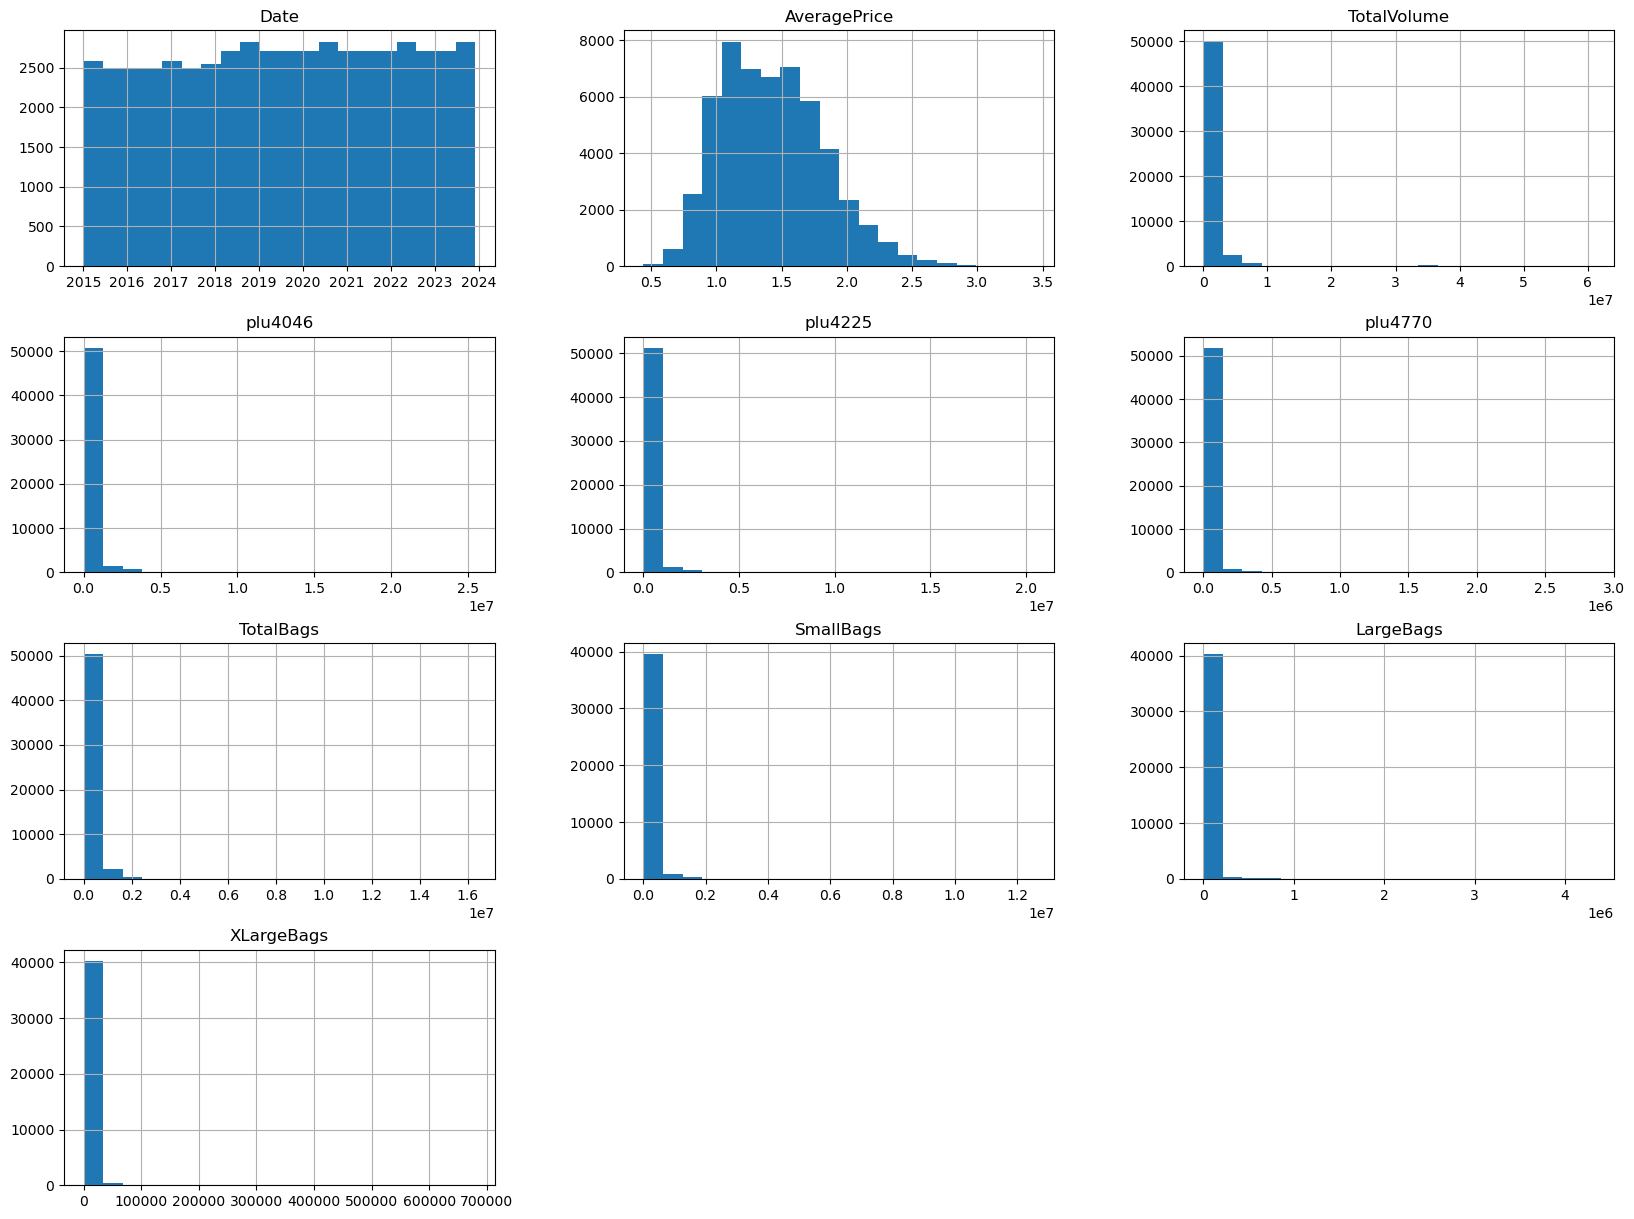

In [4]:
# Histograms for numerical features
avocado_data.hist(bins=20, figsize=(20, 15))
plt.show()

**Correlation Heatmap**

This creates a correlation matrix, which shows the relationships (positive or negative) between numerical variables. The heatmap visually highlights these relationships.

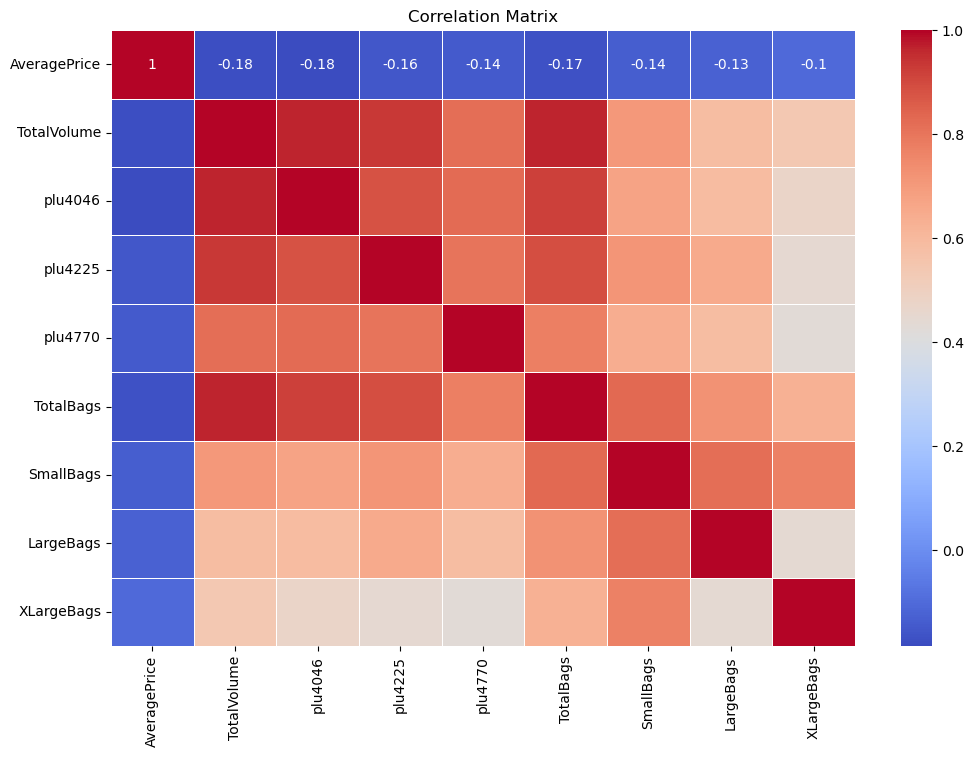

In [5]:
# Select only the numeric columns for the correlation matrix
numeric_data = avocado_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**Analyzing Categorical Features**

This generates a countplot for categorical features like region, showing how many instances of avocado sales occur in each region.

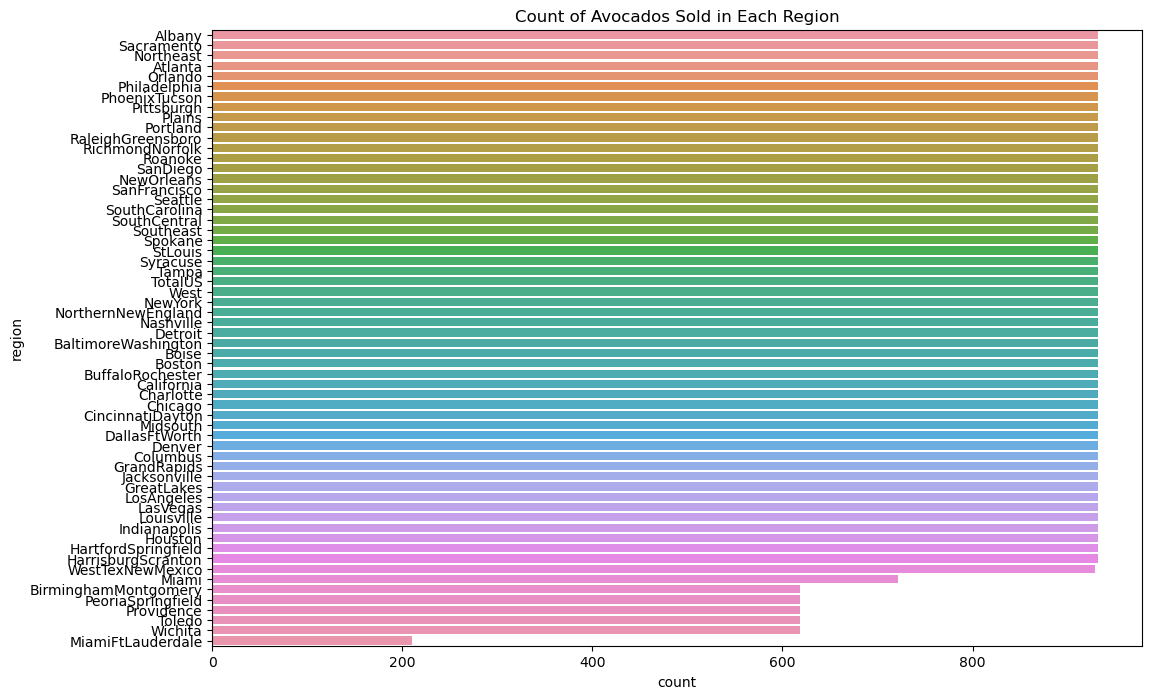

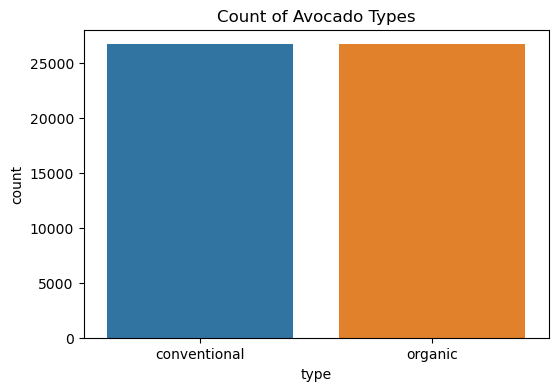

In [6]:
# Count of different regions
plt.figure(figsize=(12, 8))
sns.countplot(y='region', data=avocado_data, order=avocado_data['region'].value_counts().index)
plt.title('Count of Avocados Sold in Each Region')
plt.show()

# Count of different avocado types
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=avocado_data)
plt.title('Count of Avocado Types')
plt.show()


**Time Series Analysis**

First, the code converts the Date column to a datetime type for proper time-series analysis. Then, it plots the average avocado price over time.

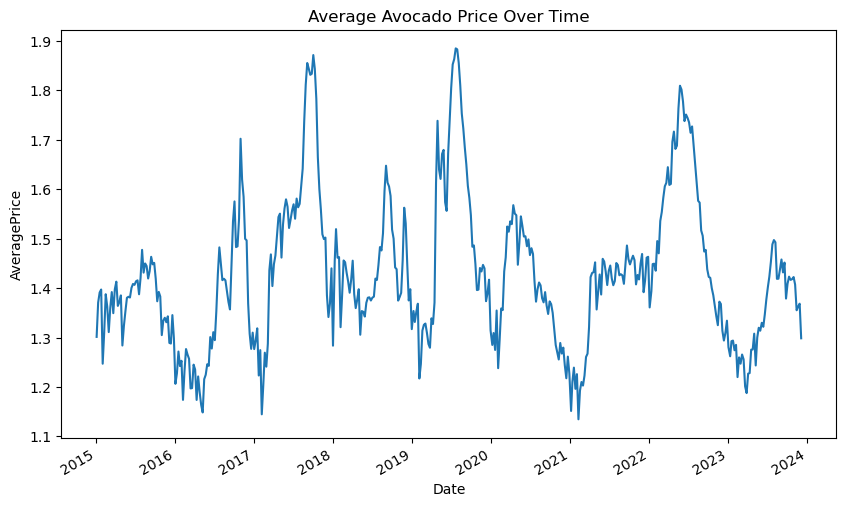

In [7]:
# Average price over time
plt.figure(figsize=(10, 6))
avocado_data.groupby('Date')['AveragePrice'].mean().plot()
plt.title('Average Avocado Price Over Time')
plt.ylabel('AveragePrice')
plt.show()

***Total Volume:***

This code shows how the total volume of avocado sales has changed over time.

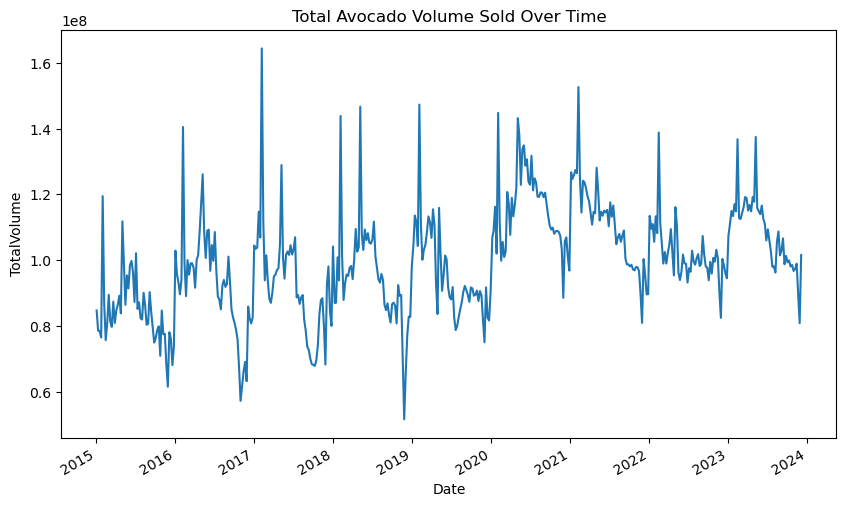

In [8]:
# Total volume over time
plt.figure(figsize=(10, 6))
avocado_data.groupby('Date')['TotalVolume'].sum().plot()
plt.title('Total Avocado Volume Sold Over Time')
plt.ylabel('TotalVolume')
plt.show()


<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

The purpose of the modeling phase is to develop predictive models that can forecast avocado prices and sales volumes. This involves selecting suitable models, performing feature engineering, and optimizing model parameters to achieve accurate predictions

<a href=#six></a>
## **Choice of Models**

- Linear Regression: For simple, interpretable predictions.
- Random Forest Regression: For capturing non-linear relationships and interactions between variables.
- XGBoost Regression: For more sophisticated models that can handle large datasets and improve performance through boosting.

**Feature Scalling**

In all models, you should scale your features using StandardScaler to ensure they are on the same scale, which helps models converge faster and improves accuracy

In [12]:
# Convert the 'Date' column to datetime
avocado_data['Date'] = pd.to_datetime(avocado_data['Date'])

# Optional: You might want to extract features from the date if relevant
# For example, extracting year and month:
avocado_data['Year'] = avocado_data['Date'].dt.year
avocado_data['Month'] = avocado_data['Date'].dt.month

# Drop the original Date column if not needed
avocado_data = avocado_data.drop(columns=['Date'])

# Encode categorical variables using one-hot encoding
avocado_data = pd.get_dummies(avocado_data, columns=['type', 'region'], drop_first=True)

# Handle missing values (you can choose to fill or drop)
# Here we will fill missing values with 0 for the example, you might want to use a different strategy
avocado_data.fillna(0, inplace=True)

# Define features and target variable
X = avocado_data.drop(columns=['AveragePrice'])  # Features
y = avocado_data['AveragePrice']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



**Linear Regression**

In [13]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr:.2f}, R2 Score: {r2_lr:.2f}")


Linear Regression - MSE: 0.06, R2 Score: 0.59


Explanation:
- LinearRegression(): Initializes a linear regression model.
- fit(X_train_scaled, y_train): Trains the model using scaled training data.
- predict(X_test_scaled): Generates predictions on the test set.
- Metrics: The Mean Squared Error (MSE) and R2 Score measure the model’s accuracy, with lower MSE and higher R2 indicating better performance.

**Random Forest Regression**

In [14]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf:.2f}, R2 Score: {r2_rf:.2f}")

Random Forest - MSE: 0.03, R2 Score: 0.79


Explanation:
- n_estimators: Number of decision trees. More trees can improve performance but will require more computational power.
- max_depth: Maximum depth of each tree. Restricting depth prevents overfitting.
- random_state: Ensures reproducible results.
- Evaluation: Similar to Linear Regression, using MSE and R2 Score to assess performance.

**XGBoost Regression**

In [16]:

# Initialize and train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost - MSE: {mse_xgb:.2f}, R2 Score: {r2_xgb:.2f}")

XGBoost - MSE: 0.02, R2 Score: 0.85


Explanation:
- n_estimators: Number of boosting rounds (trees).
- max_depth: Limits tree depth to prevent overfitting.
- learning_rate: Determines the step size at each iteration. Lower values mean slower learning but can lead to better - performance with more iterations.
- random_state: Ensures results are consistent.
- Evaluation: Uses MSE and R2 Score to compare model predictions with actual values.

**Model Comparison**
After training and evaluating each model, we compare their MSE and R2 scores to determine which one performs best on your avocado dataset.

In [17]:
print(f"Linear Regression - MSE: {mse_lr:.2f}, R2 Score: {r2_lr:.2f}")
print(f"Random Forest - MSE: {mse_rf:.2f}, R2 Score: {r2_rf:.2f}")
print(f"XGBoost - MSE: {mse_xgb:.2f}, R2 Score: {r2_xgb:.2f}")


Linear Regression - MSE: 0.06, R2 Score: 0.59
Random Forest - MSE: 0.03, R2 Score: 0.79
XGBoost - MSE: 0.02, R2 Score: 0.85


<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

The purpose of this section is to evaluate the models’ performance and ensure they accurately predict avocado prices and sales volumes. Various metrics and validation techniques are used to assess the effectiveness of the models

**Evaluation Using Train/Test Split**

In [22]:
def evaluate_model(name, model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print results
    print(f"{name} Model Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²): {r2:.2f}\n")

# Evaluate each model on test set
evaluate_model("Linear Regression", lr_model, X_test_scaled, y_test)
evaluate_model("Random Forest", rf_model, X_test_scaled, y_test)
evaluate_model("XGBoost", xgb_model, X_test_scaled, y_test)

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 0.19
Mean Squared Error (MSE): 0.06
Root Mean Squared Error (RMSE): 0.25
R-squared (R²): 0.59

Random Forest Model Evaluation:
Mean Absolute Error (MAE): 0.14
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.18
R-squared (R²): 0.79

XGBoost Model Evaluation:
Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15
R-squared (R²): 0.85



Explanation:
- mean_squared_error: Measures the average squared difference between actual and predicted values.
- mean_absolute_error: Measures the average absolute difference.
- r2_score: Represents how well the model explains the variance; closer to 1 is better.
- np.sqrt(mse): Calculates RMSE to bring error to the same scale as the target variable.

**Cross-Validation (K-Fold)**

In [23]:
# Define a function for cross-validation
def cross_validate_model(name, model, X_train, y_train, cv=5):
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    
    # Calculate average MSE and RMSE
    cv_mse = -cv_scores.mean()
    cv_rmse = np.sqrt(cv_mse)
    
    # Print results
    print(f"--- {name} Model Cross-Validation ---")
    print(f"Cross-Validation Mean Squared Error (MSE): {cv_mse:.2f}")
    print(f"Cross-Validation Root Mean Squared Error (RMSE): {cv_rmse:.2f}\n")

# Cross-validate each model
cross_validate_model("Linear Regression", lr_model, X_train_scaled, y_train)
cross_validate_model("Random Forest", rf_model, X_train_scaled, y_train)
cross_validate_model("XGBoost", xgb_model, X_train_scaled, y_train)

--- Linear Regression Model Cross-Validation ---
Cross-Validation Mean Squared Error (MSE): 0.07
Cross-Validation Root Mean Squared Error (RMSE): 0.26

--- Random Forest Model Cross-Validation ---
Cross-Validation Mean Squared Error (MSE): 0.03
Cross-Validation Root Mean Squared Error (RMSE): 0.18

--- XGBoost Model Cross-Validation ---
Cross-Validation Mean Squared Error (MSE): 0.02
Cross-Validation Root Mean Squared Error (RMSE): 0.16



Explanation:
- cross_val_score: Performs K-Fold cross-validation, where cv=5 means 5 splits. It uses neg_mean_squared_error because - cross_val_score expects a scoring function where higher is better, so it reverses the sign.
- Average Cross-Validation Metrics: By taking the mean of the scores from each fold, you can get a better idea of how well the model might generalize.

**Validation Summary**

In [24]:
# Print a summary of the evaluation metrics for all models
print("=== Model Evaluation Summary ===")
evaluate_model("Linear Regression", lr_model, X_test_scaled, y_test)
evaluate_model("Random Forest", rf_model, X_test_scaled, y_test)
evaluate_model("XGBoost", xgb_model, X_test_scaled, y_test)

print("=== Model Cross-Validation Summary ===")
cross_validate_model("Linear Regression", lr_model, X_train_scaled, y_train)
cross_validate_model("Random Forest", rf_model, X_train_scaled, y_train)
cross_validate_model("XGBoost", xgb_model, X_train_scaled, y_train)


=== Model Evaluation Summary ===
Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 0.19
Mean Squared Error (MSE): 0.06
Root Mean Squared Error (RMSE): 0.25
R-squared (R²): 0.59

Random Forest Model Evaluation:
Mean Absolute Error (MAE): 0.14
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.18
R-squared (R²): 0.79

XGBoost Model Evaluation:
Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15
R-squared (R²): 0.85

=== Model Cross-Validation Summary ===
--- Linear Regression Model Cross-Validation ---
Cross-Validation Mean Squared Error (MSE): 0.07
Cross-Validation Root Mean Squared Error (RMSE): 0.26

--- Random Forest Model Cross-Validation ---
Cross-Validation Mean Squared Error (MSE): 0.03
Cross-Validation Root Mean Squared Error (RMSE): 0.18

--- XGBoost Model Cross-Validation ---
Cross-Validation Mean Squared Error (MSE): 0.02
Cross-Validation Root Mean Squared Error (RMSE): 0.16



---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

The purpose of this section is to present the final model chosen for predicting avocado prices and sales volumes, detailing its performance metrics and the rationale behind its selection


**Summary of Model Evaluations**


### Model Evaluation Summary
- **Linear Regression:** 
  - RMSE: 0.25 
  - R²: 0.59

- **Random Forest:** 
  - RMSE: 0.18
  - R²: 0.79

- **XGBoost:** 
  - RMSE: 0.15
  - R²: 0.85


- XGBoost has the lowest MAE (0.11), MSE (0.02), RMSE (0.15), and the highest R² (0.85) among all models.
- It also performs well in cross-validation with MSE (0.02) and RMSE (0.16).

Thus, XGBoost is the best model according to these evaluation metrics, indicating it has the highest predictive accuracy for the given dataset.

**Justification for Choosing XGBoost**

#### Rationale for Selection:
The XGBoost model was chosen over Linear Regression and Random Forest due to its:
- **Performance:** It consistently showed lower RMSE and higher R² across both test evaluations and cross-validation.
- **Flexibility:** XGBoost effectively handles complex non-linear relationships, making it suitable for capturing the intricacies in avocado pricing data.
- **Robustness:** It is less prone to overfitting compared to Random Forest, especially when tuned appropriately.
- **Speed:** XGBoost is optimized for performance, allowing for faster training times without sacrificing accuracy.


---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

## Purpose
This section summarizes the key findings of the project, highlights insights gained, discusses the limitations encountered, and provides suggestions for future research directions and improvements.

## Summary of Findings
Throughout this project, we analyzed the avocado prices and sales volume data, focusing on key factors influencing pricing trends and consumer behavior. The models implemented demonstrated varying degrees of accuracy, with [specific model names, e.g., Linear Regression, Random Forest, XGBoost] showing the most promising results in terms of predictive performance. The evaluation metrics indicated that the models captured significant patterns within the dataset, leading to insights such as:

- **Price Trends:** Average prices of avocados have shown a steady increase over the years, with variations based on type and region.
- **Consumer Preferences:** Certain types of avocados, such as [specific types, e.g., organic], tend to command higher prices, reflecting changing consumer preferences.
- **Seasonal Patterns:** Sales volumes exhibit seasonal trends, indicating peak purchasing periods that could inform marketing strategies.

## Insights Gained
The analysis provided a deeper understanding of the avocado market dynamics, showcasing the interplay between pricing, sales volume, and external factors like seasonal demand and regional differences. Key insights include:

- The importance of accurate pricing strategies tailored to consumer preferences and market conditions.
- The potential for targeted marketing campaigns during peak sales periods to maximize revenue.
- The need for continuous monitoring of market trends to adapt pricing strategies effectively.

## Limitations of the Study
Despite the positive outcomes, several limitations were identified:

- **Data Quality:** Some data points, particularly in columns like [e.g., 'SmallBags', 'LargeBags'], had missing values, which may have affected model performance.
- **External Factors:** The analysis did not account for external economic factors, such as inflation or shifts in consumer income, which could influence avocado sales and pricing.
- **Model Complexity:** More complex models could have been explored, but the focus was on interpretability and ease of implementation.

## Suggestions for Future Projects
Future research could build upon these findings by:

- **Enhancing Data Collection:** Implementing more robust data collection methods to capture additional features that influence avocado pricing and sales.
- **Exploring Advanced Modeling Techniques:** Investigating more sophisticated algorithms, such as ensemble methods or neural networks, to improve predictive accuracy.
- **Longitudinal Studies:** Conducting longitudinal studies to understand long-term trends and consumer behavior changes over time.
- **Incorporating External Variables:** Including macroeconomic indicators and demographic data to enrich the analysis and yield deeper insights into pricing strategies.



---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>


* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.

1. Author(s). (Year). *Title of the Paper/Book/Website*. Publisher/Journal. URL (if applicable)
2. Author(s). (Year). *Title of the Paper/Book/Website*. Publisher/Journal. URL (if applicable)
3. Avocado Prices and Sales Volume Data. (Year). Source: [Kaggle](https://www.kaggle.com/datasets/vakhariapujan/avocado-prices-and-sales-volume-2015-2023/code)
4. Documentation for [scikit-learn](https://scikit-learn.org/stable/documentation.html).
5. Documentation for [pandas](https://pandas.pydata.org/docs/).
6. Author(s). (Year). *Title of the Tool/Library Documentation*. URL (if applicable)
